In [ ]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
    
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

In [5]:
#Run this once to run the .py file.
os.chdir(parentdir)
%run Analysis.py
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

In [4]:
pd.set_option('display.max_columns', 500)

# Long time traces

## list of points

In [5]:
folder_longtraces = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_longtime'
point_list(foldername=folder_longtraces)

,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,Point_11,Point_12,Point_13,Point_14,Point_15,Point_16,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24
0,75.0,75.0,75.0,75.0,75.0,75.0,25.0,25.0,25.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0


## time trace plot

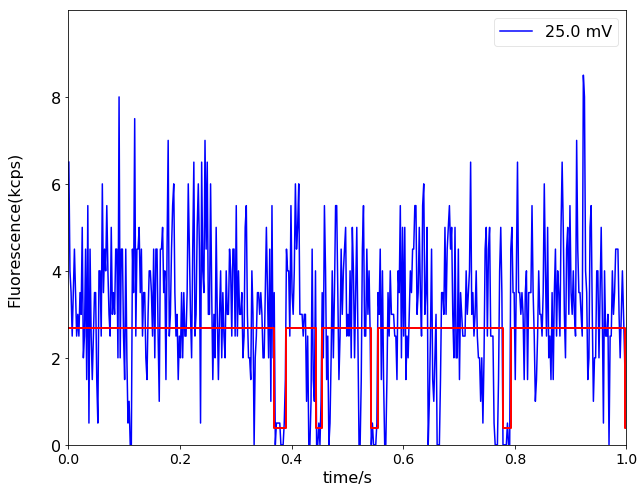

In [19]:
fig = time_trace_plot(foldername= folder_longtraces, input_potential=[25], pointnumbers=[8],
                      x_lim_min=0, y_lim_min=0, x_lim_max=1, y_lim_max=10, bin=2, show_changepoint=True)

## Ton_Toff histogram:2D

### 0 mV

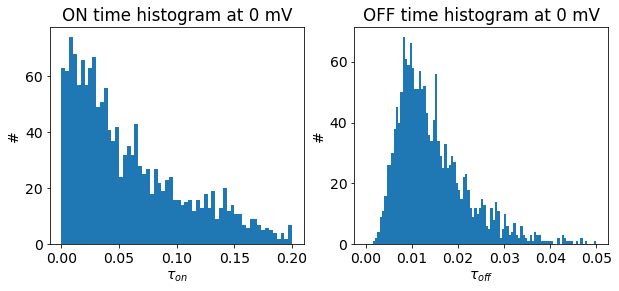

In [29]:
folder_longtraces = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_longtime';#data directory
t_ons, t_offs = histogram_on_off_1mol(foldername= folder_longtraces, input_potential=[0], pointnumbers=[18], bins_on=60, range_on=[0, 0.2], bins_off=100, range_off=[0, 0.05], plotting=True)
# os.chdir(parentdir)
# savefig('Figure_3part_on_off_1D_100mV.pdf', dpi=300, transparent=True)

## Ton_Toff 2D histogram

In [24]:
def hist2D_on_off(foldername=foldername, input_potential=[100], pointnumbers=[24], bins_on=40, range_on=[0, 0.01], bins_off=50, range_off=[0, 1], x_shift=10, plots=True):
    t_ons, t_offs = histogram_on_off_1mol(foldername= foldername, input_potential=input_potential, pointnumbers=pointnumbers, plotting=False)
    t_ons=pd.Series(t_ons);t_offs=pd.Series(t_offs)
    t_on_shifted_1 = t_ons.shift(+1) ## shift up
    t_on_delay_1 = pd.DataFrame([t_on_shifted_1, t_ons]); t_on_delay_1=t_on_delay_1.T
    t_on_delay_1 = t_on_delay_1.dropna();
    t_off_shifted_1 = t_offs.shift(+1) ## shift up

    t_on_shifted_x = t_ons.shift(+x_shift) ## shift up
    t_off_shifted_x = t_offs.shift(+x_shift) ## shift up

    if plots==True:
        import matplotlib as mpl
        colormap=mpl.cm.RdBu_r
        fig = plt.figure(figsize=(16,8))

        ax1 = fig.add_subplot(2,3,1)#2,2,1
        C_on_1,Ex_on_1,Ey_on_1, figu = hist2d(t_on_shifted_1[1:], t_ons[1:], range=[range_on, range_on], bins=bins_on, norm=mpl.colors.LogNorm(), cmap=colormap)
        Ex_on_1,Ey_on_1 = meshgrid(Ex_on_1,Ey_on_1)
        colorbar()
        ax1.set_title('ON time Zn-Azu %smV' %input_potential)
        ax1.set_xlabel(r'$\tau_{on}/s$')
        ax1.set_ylabel(r'$\tau_{on}+1/s$')

        ax2 = fig.add_subplot(2,3,2)#2,2,1
        C_on_x,Ex_on_x,Ey_on_x, figu = hist2d(t_on_shifted_x[x_shift:], t_ons[x_shift:], range=[range_on, range_on], bins=bins_on, norm=mpl.colors.LogNorm(), cmap=colormap)
        Ex_on_x,Ey_on_x = meshgrid(Ex_on_x,Ey_on_x)
        colorbar()
        ax2.set_title('ON time Zn-Azu %smV' %input_potential)
        ax2.set_xlabel(r'$\tau_{on}/s$')
        ax2.set_ylabel(r'$\tau_{on}+%s/s$'%x_shift)

        ax3 = fig.add_subplot(2,3,3)
        C_on_diff = C_on_1-C_on_x;
        pcm=ax3.pcolormesh(Ex_on_x, Ey_on_x, C_on_diff,
                       norm=mpl.colors.SymLogNorm(linthresh=0.03, linscale=0.03,vmin=C_on_diff.min(), vmax=C_on_diff.max()), cmap=colormap)
        fig.colorbar(pcm, ax=ax3, extend='max')

        ax4 = fig.add_subplot(2,3,4)
        C_off_1, Ex_off_1, Ey_off_1, figu= hist2d(t_off_shifted_1[1:], t_offs[1:], range=[range_off, range_off],bins=bins_off, norm=mpl.colors.LogNorm(), cmap=colormap);#, norm=mpl.colors.LogNorm()
        Ex_off_1, Ey_off_1 = meshgrid(Ex_off_1, Ey_off_1)
        colorbar()
        ax4.set_title('OFF time ZN-Azu %smV' %input_potential)
        ax4.set_xlabel(r'$\tau_{off}/s$')
        ax4.set_ylabel(r'$\tau_{off}+1/s$')

        ax5 = fig.add_subplot(2,3,5)
        C_off_x,Ex_off_x,Ey_off_x, figu = hist2d(t_off_shifted_x[x_shift:], t_offs[x_shift:], range=[range_off, range_off],bins=bins_off, norm=mpl.colors.LogNorm(), cmap=colormap);#, norm=mpl.colors.LogNorm()
        Ex_off_x,Ey_off_x = meshgrid(Ex_off_x,Ey_off_x)
        colorbar()
        ax5.set_title('OFF time ZN-Azu %smV' %input_potential)
        ax5.set_xlabel(r'$\tau_{off}/s$')
        ax5.set_ylabel(r'$\tau_{off}+%s/s$'%x_shift)

        ax6 = fig.add_subplot(2,3,6)
        C_off_diff=C_off_1-C_off_x
        pcm=ax6.pcolormesh(Ex_off_x, Ey_off_x, C_off_diff, norm=mpl.colors.SymLogNorm(linthresh=0.03, linscale=0.03,vmin=C_off_diff.min(), vmax=C_off_diff.max()), cmap=colormap)
        fig.colorbar(pcm, ax=ax6, extend='max')
        plt.tight_layout()
    return(C_on_diff, C_off_diff)

### 100 mV

#### Point_13: 340 s

Number of on events: 1669
Number of off events: 1667


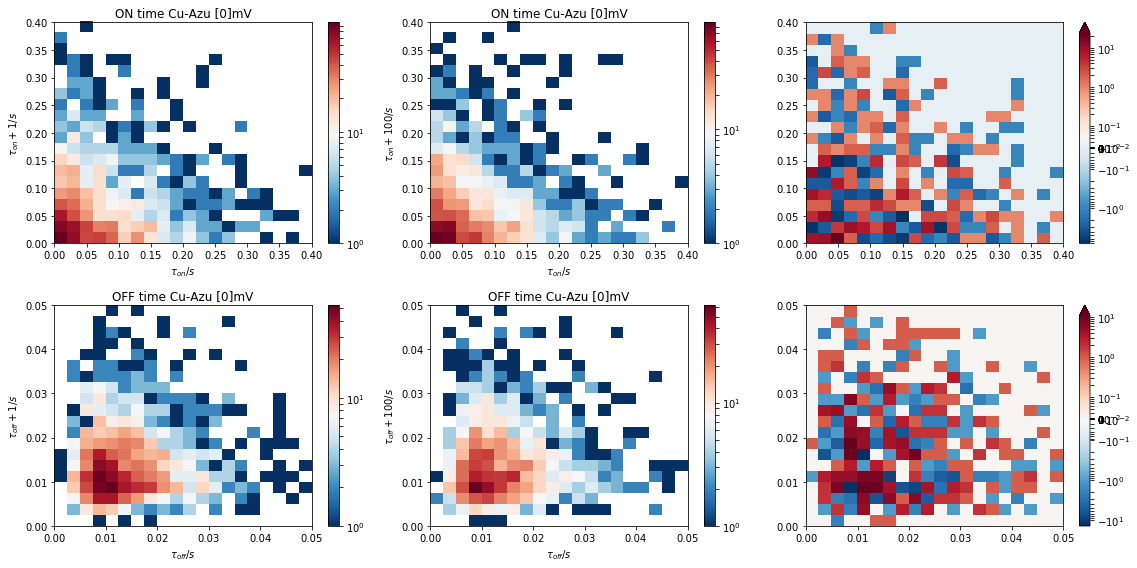

In [33]:
folder_longtraces = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_longtime';#data directory
C_on_diff, C_off_diff = hist2D_on_off(foldername=folder_longtraces, input_potential=[0], pointnumbers=[13], bins_on=20, range_on=[0, 0.4], bins_off=20, range_off=[0, 0.05], x_shift=100, plots=True)

#### all molecules

Number of on events: 7492
Number of off events: 7482


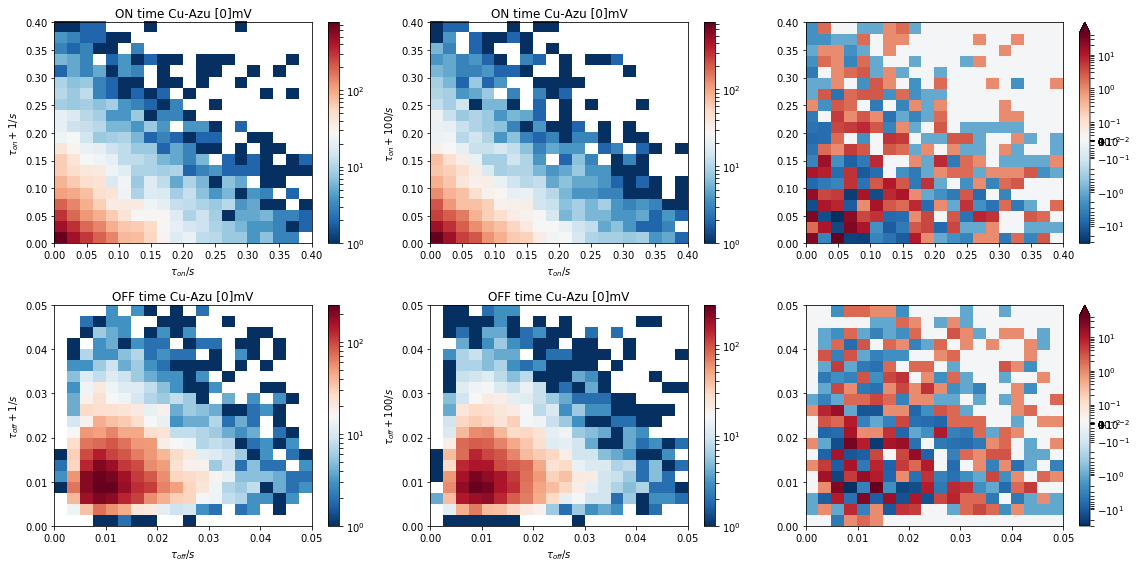

In [32]:
folder_longtraces = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_longtime';#data directory
C_on_diff, C_off_diff = hist2D_on_off(foldername=folder_longtraces, input_potential=[0], pointnumbers=range(50), bins_on=20, range_on=[0, 0.4], bins_off=20, range_off=[0, 0.05], x_shift=100, plots=True)

# Short traces

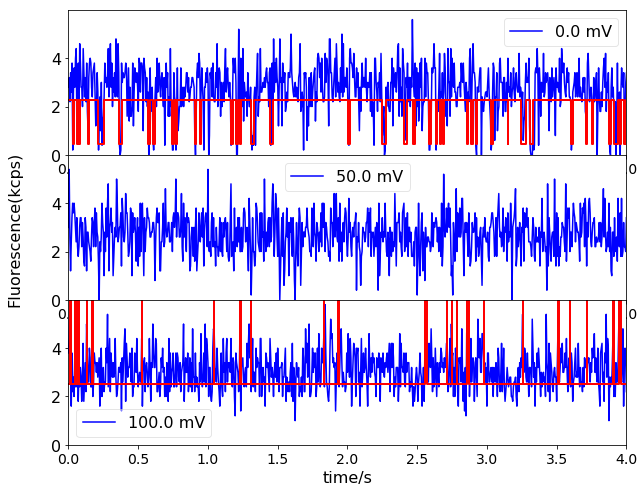

In [9]:
folder_Zn=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_SM/S107d1May17_635_ZnAzu655_SM_A2_30s'
fig = time_trace_plot(foldername= folder_Zn, input_potential=[0, 50, 100], pointnumbers=[2], x_lim_min=0, y_lim_min=0, x_lim_max=4, y_lim_max=6, bin=5, show_changepoint=True)
# os.chdir(parentdir)
# savefig('SI_timetrace_Zn_part.pdf', dpi=300, transparent=True)